# Анализ компаний-резидентов Сколково

## Скачиваем данные из API сайта с информацией о резидентах

In [3]:
import requests
import pandas as pd
def get_data():
    companies = []
    companies2 = []


    cookies = {
        'navigator_session_logs': 'b7f4b446c3ab8b377a856a34dddc6e22',
        'navigator_session': 'eyJfZnJlc2giOmZhbHNlLCJ1c2VyX2lkIjowfQ.Y8lTAQ.ElMwZr-8Fax77G2Q1sY03XeyH0U',
        '_ym_uid': '1674138143696582334',
        '_ym_d': '1674138143',
        '_ym_isad': '2',
        '_ym_visorc': 'w',
    }

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/109.0',
        'Accept': '*/*',
        'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
        # 'Accept-Encoding': 'gzip, deflate, br',
        'Referer': 'https://navigator.sk.ru/?q=N4IgZiBcoC4IYHMDOB9GBPADgUyiA9gE4gC%2BANCEngLQC22tARtoSkgJYB2AxrhZlABMJIA',
        'Origin': 'https://navigator.sk.ru',
        'Connection': 'keep-alive',
        # 'Cookie': 'navigator_session_logs=b7f4b446c3ab8b377a856a34dddc6e22; navigator_session=eyJfZnJlc2giOmZhbHNlLCJ1c2VyX2lkIjowfQ.Y8lTAQ.ElMwZr-8Fax77G2Q1sY03XeyH0U; _ym_uid=1674138143696582334; _ym_d=1674138143; _ym_isad=2; _ym_visorc=w',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'no-cors',
        'Sec-Fetch-Site': 'same-origin',
        # Requests doesn't support trailers
        # 'TE': 'trailers',
        'Content-Type': 'application/json;charset=utf-8',
        'Pragma': 'no-cache',
        'Cache-Control': 'no-cache',
    }

    for i in range(1, 76):
        json_data = {
        'key': '707c4beebeed60264ba0684c01dd334a',
        'sort': '-member_since',
        'page': i,
        'filters': {
            'tags_type': 'or',
        },
        'limit': 48,
        }

        response = requests.post(
        'https://navigator.sk.ru/navigator/api/search/only_companies/',
        cookies=cookies,
        headers=headers,
        json=json_data,
        )
        data = response.json()
        print(i, response.status_code)
        companies.append(data['companies'])

    for i in range(len(companies)):
        for j in range(len(companies[i])):
            companies2.append(companies[i][j])

    df = pd.DataFrame(companies2)
    # преобразуем к нужному формату, и создаём DataFrame
    return df

In [67]:
import os.path
if os.path.isfile('sk_residents_start.pickle'):
    df = pd.read_pickle('sk_residents_start.pickle')
    print('Файл с данными найден, можно открывать датафрейм')
else:
    print('Файл с данными не найден, сейчас загрузим')
    df = get_data()
    df.to_pickle('sk_residents_start.pickle')

Файл с данными найден, можно открывать датафрейм


In [68]:
df

,id,orn,inn,kpp,ogrn,name,full_name,description,short_description,foundation_year,...,accredited_it,domestic_software,know_how_counts,has_knowhow,has_ip,tags,projects,rank,company_has_patents,company_has_competition_win
0,5292,1125221,6685136547,668501001,1176658069521,"{'ru': 'АТОМ ЭКОЛОГИЯ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'О КОМПАНИИ • Более 20 лет в строитель...,"{'ru': None, 'en': None}",2017,...,False,False,None,False,False,[],"[{'id': 7654, 'name': {'ru': 'Технология произ...",None,False,False
1,5293,1125222,5905070187,590501001,1215900024174,"{'ru': 'ПИЦЦАБОТ-ПЕРМЬ', 'en': 'PIZZABOT-PERM ...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': 'Robotic kiosk-pizzeria - h...","{'ru': None, 'en': None}",2021,...,True,False,None,False,False,[],"[{'id': 7655, 'name': {'ru': 'PizzaBOT - робот...",None,False,False
2,5294,1125223,6679161471,667901001,1226600084424,"{'ru': 'ПРОЕКТ ОКТОПУС', 'en': 'PROJECT OCTOPU...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': 'Restoration of hydraulic i...","{'ru': None, 'en': None}",2022,...,False,False,None,False,False,[],"[{'id': 7656, 'name': {'ru': 'Организация сухо...",None,False,False
3,5295,1125224,5040165174,504001001,1195027026314,"{'ru': 'ГК ТЕХНОЛОГИЯ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': None}","{'ru': None, 'en': None}",2019,...,False,False,None,False,False,[],"[{'id': 7657, 'name': {'ru': 'Производство и к...",None,False,False
4,5296,1125225,5001086585,236801001,1125001000255,"{'ru': 'ДЕВПРОМ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': None}","{'ru': None, 'en': None}",2012,...,True,True,None,False,False,[],"[{'id': 7658, 'name': {'ru': 'Devprom ALM – от...",None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,"{'ru': 'ВНХ-ЭНЕРГО', 'en': 'VNH-Energo'}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'ООО «ВНХ-Энерго» с 2012 г. осуществляе...,"{'ru': None, 'en': None}",2012,...,False,False,None,False,True,"[8577, 8417, 8385, 8071, 7912, 8138, 7915, 791...","[{'id': 5294, 'name': {'ru': 'Техника и технол...",None,True,False
3555,412,1120541,7604195933,760401001,1117604000018,"{'ru': 'ИТЦ КОНТИНУУМ', 'en': 'EC Continuum'}","{'ru': 'АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧ...",{'ru': 'ИТЦ «Континуум» является разработчиком...,"{'ru': None, 'en': None}",2011,...,True,False,None,False,True,"[8355, 7915, 8274, 8444, 7989, 8535, 8060]","[{'id': 445, 'name': {'ru': 'Цифровой счетчик ...",None,True,False
3556,931,1120543,5408290739,540801001,1115476130956,"{'ru': 'НПО МФ ТЕХНОЛОГИИ', 'en': 'Limited Lia...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'НПО «МФ Технологии» является разработч...,"{'ru': None, 'en': None}",2011,...,True,False,None,False,True,"[8385, 7971, 8298, 8075, 7915, 8365]","[{'id': 1026, 'name': {'ru': 'IRUSSCAN', 'en':...",None,True,False
3557,517,1120539,7731661104,773101001,1107746952433,"{'ru': 'КРИБРУМ', 'en': 'Кribrum'}","{'ru': 'АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""', 'en':...",{'ru': 'Компания Крибрум – исследовательская и...,"{'ru': None, 'en': None}",2010,...,True,True,None,False,True,"[8160, 7969, 8163, 8355, 8357, 7915, 7917, 852...","[{'id': 561, 'name': {'ru': 'Крибрум-система м...",None,True,False


# Данные скачали, пора привести к нужным типам и почистить

In [69]:
df.status_add_date = pd.to_datetime(df.status_add_date)
#Приводим даты к типу данных "дата"

In [70]:
df.drop(['know_how_counts', 'has_knowhow'], axis=1, inplace=True)

In [71]:
a = df.applymap(lambda x:isinstance(x, dict)).any()
dict_cols = a[a].index.tolist()
df[dict_cols]
#Находим, и выводим все столбцы, которые содержат словари

,name,full_name,description,short_description
0,"{'ru': 'АТОМ ЭКОЛОГИЯ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'О КОМПАНИИ • Более 20 лет в строитель...,"{'ru': None, 'en': None}"
1,"{'ru': 'ПИЦЦАБОТ-ПЕРМЬ', 'en': 'PIZZABOT-PERM ...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': 'Robotic kiosk-pizzeria - h...","{'ru': None, 'en': None}"
2,"{'ru': 'ПРОЕКТ ОКТОПУС', 'en': 'PROJECT OCTOPU...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': 'Restoration of hydraulic i...","{'ru': None, 'en': None}"
3,"{'ru': 'ГК ТЕХНОЛОГИЯ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': None}","{'ru': None, 'en': None}"
4,"{'ru': 'ДЕВПРОМ', 'en': None}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,"{'ru': None, 'en': None}","{'ru': None, 'en': None}"
...,...,...,...,...
3554,"{'ru': 'ВНХ-ЭНЕРГО', 'en': 'VNH-Energo'}",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'ООО «ВНХ-Энерго» с 2012 г. осуществляе...,"{'ru': None, 'en': None}"
3555,"{'ru': 'ИТЦ КОНТИНУУМ', 'en': 'EC Continuum'}","{'ru': 'АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧ...",{'ru': 'ИТЦ «Континуум» является разработчиком...,"{'ru': None, 'en': None}"
3556,"{'ru': 'НПО МФ ТЕХНОЛОГИИ', 'en': 'Limited Lia...",{'ru': 'ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТ...,{'ru': 'НПО «МФ Технологии» является разработч...,"{'ru': None, 'en': None}"
3557,"{'ru': 'КРИБРУМ', 'en': 'Кribrum'}","{'ru': 'АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""', 'en':...",{'ru': 'Компания Крибрум – исследовательская и...,"{'ru': None, 'en': None}"


In [72]:
df[[f'{i}_ru' for i in dict_cols]] = None
df[[f'{i}_en' for i in dict_cols]] = None
#создаём пустые колонки, и заполняем их

In [73]:
for i in dict_cols:
    for j in range(len(df)):
        df[f'{i}_ru'].iloc[j] = df[i][j]['ru']
        df[f'{i}_en'].iloc[j] = df[i][j]['en']
        #распределяем значения из словарей по колонкам

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\3793315295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i}_ru'].iloc[j] = df[i][j]['ru']
C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\3793315295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i}_en'].iloc[j] = df[i][j]['en']


In [74]:
df.drop([i for i in dict_cols], inplace=True, axis=1)
#удаляем старые колонки со словарями

In [75]:
df

,id,orn,inn,kpp,ogrn,foundation_year,status,status_add_date,status_del_date,sk_member,...,company_has_patents,company_has_competition_win,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en
0,5292,1125221,6685136547,668501001,1176658069521,2017,draft,2023-03-03,None,True,...,False,False,АТОМ ЭКОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АТОМ...",О КОМПАНИИ\n\n• Более 20 лет в строительном ин...,None,None,None,None,None
1,5293,1125222,5905070187,590501001,1215900024174,2021,draft,2023-03-03,None,True,...,False,False,ПИЦЦАБОТ-ПЕРМЬ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПИЦЦ...",None,None,PIZZABOT-PERM LIMITED LIABILITY COMPANY,PIZZABOT-PERM LIMITED LIABILITY COMPANY,Robotic kiosk-pizzeria - high-quality portione...,None
2,5294,1125223,6679161471,667901001,1226600084424,2022,draft,2023-03-03,None,True,...,False,False,ПРОЕКТ ОКТОПУС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",None,None,PROJECT OCTOPUS Limited trade development,PROJECT OCTOPUS Limited trade development,"Restoration of hydraulic infrastructure, road ...",None
3,5295,1125224,5040165174,504001001,1195027026314,2019,draft,2023-03-03,None,True,...,False,False,ГК ТЕХНОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",None,None,None,None,None,None
4,5296,1125225,5001086585,236801001,1125001000255,2012,draft,2023-03-03,None,True,...,False,False,ДЕВПРОМ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЕВП...",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,2012,draft,2013-03-20,None,True,...,True,False,ВНХ-ЭНЕРГО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВНХ-...",ООО «ВНХ-Энерго» с 2012 г. осуществляет научны...,None,VNH-Energo,VNH-Energo,"Technology of recycling biomass, organic waste...",None
3555,412,1120541,7604195933,760401001,1117604000018,2011,draft,2013-03-20,None,True,...,True,False,ИТЦ КОНТИНУУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧЕСКИЙ ЦЕ...",ИТЦ «Континуум» является разработчиком цифровы...,None,EC Continuum,EC Continuum,The project aims to develop and commercialize ...,None
3556,931,1120543,5408290739,540801001,1115476130956,2011,draft,2013-03-20,None,True,...,True,False,НПО МФ ТЕХНОЛОГИИ,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НАУЧН...,НПО «МФ Технологии» является разработчиком и п...,None,Limited Liability Company Research and Product...,Limited Liability Company Research and Product...,"Project goal is: \r\n- to create a prototype, ...",None
3557,517,1120539,7731661104,773101001,1107746952433,2010,draft,2013-03-18,None,True,...,True,False,КРИБРУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""",Компания Крибрум – исследовательская и техноло...,None,Кribrum,Кribrum,None,None


In [76]:
try:
    for i in df.columns:
        if df[i].nunique() <= 1:
            df.drop(i, inplace=True, axis=1)
except TypeError:
    pass

df.drop(['key_indicators', 'investment_funds', 'similar_companies',], inplace=True, axis=1)
#Удаляем неинформативные столбцы

In [77]:
b = df.applymap(lambda x:isinstance(x, list)).any()
list_cols = b[b].index.tolist()
df[list_cols]
#Находим все колонки, где есть массивы

,founders,tech_parks,grants_values_amount_per_fund,cities_of_presence,okveds,tags,projects
0,"[АТОМ, ПК УРАЛ-ГРАНИТ]","[{'id': 515, 'started_at': None, 'ended_at': N...",[],[],[{'unidata_id': 'a9eaba03-4a43-11ed-a186-87ba0...,[],"[{'id': 7654, 'name': {'ru': 'Технология произ..."
1,[КОВЫЕВ АЛЕКСЕЙ РУСЛАНОВИЧ],[],[],[],[{'unidata_id': 'a9e9814d-4a43-11ed-a186-87ba0...,[],"[{'id': 7655, 'name': {'ru': 'PizzaBOT - робот..."
2,"[ДЕДОВ СЕРГЕЙ ВЛАДИМИРОВИЧ, РУПАСОВ АНДРЕЙ ЮРЬ...","[{'id': 515, 'started_at': None, 'ended_at': N...",[],[],[{'unidata_id': 'a9e2ca6d-4a43-11ed-a186-87ba0...,[],"[{'id': 7656, 'name': {'ru': 'Организация сухо..."
3,"[ПУЛЬКИН КОНСТАНТИН ВАЛЕРЬЕВИЧ, ПУЛЬКИН ВАЛЕРИ...",[],[],[],[{'unidata_id': 'a9c3830b-4a43-11ed-a186-87ba0...,[],"[{'id': 7657, 'name': {'ru': 'Производство и к..."
4,[САВИЦКИЙ ЕВГЕНИЙ НИКОЛАЕВИЧ],[],[],[],[{'unidata_id': 'a9e2ca6d-4a43-11ed-a186-87ba0...,[],"[{'id': 7658, 'name': {'ru': 'Devprom ALM – от..."
...,...,...,...,...,...,...,...
3554,[ВОЛОБУЕВ ИГОРЬ АЛЕКСЕЕВИЧ],"[{'id': 517, 'started_at': None, 'ended_at': N...","[{'fund_name': {'ru': 'ФОНД «СКОЛКОВО»', 'en':...","[{'ru': 'Санкт-Петербург', 'en': None}]",[{'unidata_id': 'a9ded31f-4a43-11ed-a186-87ba0...,"[8577, 8417, 8385, 8071, 7912, 8138, 7915, 791...","[{'id': 5294, 'name': {'ru': 'Техника и технол..."
3555,[],"[{'id': 726, 'started_at': None, 'ended_at': N...","[{'fund_name': {'ru': 'ФОНД «СКОЛКОВО»', 'en':...","[{'ru': 'Ярославль', 'en': None}, {'ru': 'Моск...",[{'unidata_id': 'a9c66892-4a43-11ed-a186-87ba0...,"[8355, 7915, 8274, 8444, 7989, 8535, 8060]","[{'id': 445, 'name': {'ru': 'Цифровой счетчик ..."
3556,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""НАУЧНО-ПРОИЗВОДСТВЕННАЯ...","[{'id': 514, 'started_at': None, 'ended_at': N...","[{'fund_name': {'ru': 'ФОНД «СКОЛКОВО»', 'en':...","[{'ru': 'Новосибирск', 'en': None}]",[{'unidata_id': 'a9ce0984-4a43-11ed-a186-87ba0...,"[8385, 7971, 8298, 8075, 7915, 8365]","[{'id': 1026, 'name': {'ru': 'IRUSSCAN', 'en':..."
3557,[],[],"[{'fund_name': {'ru': 'ФОНД «СКОЛКОВО»', 'en':...","[{'ru': 'Москва', 'en': None}]",[{'unidata_id': 'a9d18c8a-4a43-11ed-a186-87ba0...,"[8160, 7969, 8163, 8355, 8357, 7915, 7917, 852...","[{'id': 561, 'name': {'ru': 'Крибрум-система м..."


In [78]:
try:
    for i in range(len(df.founders)):
        df.founders.iloc[i] = ', '.join(df.founders.iloc[i])
except TypeError:
     pass

# приводим имена создателей компаний к строкам

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\1101300462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.founders.iloc[i] = ', '.join(df.founders.iloc[i])


In [79]:
df

,id,orn,inn,kpp,ogrn,foundation_year,status_add_date,sk_tp_member,sk_tech_member,need_investment,...,company_has_patents,company_has_competition_win,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en
0,5292,1125221,6685136547,668501001,1176658069521,2017,2023-03-03,False,False,False,...,False,False,АТОМ ЭКОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АТОМ...",О КОМПАНИИ\n\n• Более 20 лет в строительном ин...,None,None,None,None,None
1,5293,1125222,5905070187,590501001,1215900024174,2021,2023-03-03,False,False,False,...,False,False,ПИЦЦАБОТ-ПЕРМЬ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПИЦЦ...",None,None,PIZZABOT-PERM LIMITED LIABILITY COMPANY,PIZZABOT-PERM LIMITED LIABILITY COMPANY,Robotic kiosk-pizzeria - high-quality portione...,None
2,5294,1125223,6679161471,667901001,1226600084424,2022,2023-03-03,False,False,False,...,False,False,ПРОЕКТ ОКТОПУС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",None,None,PROJECT OCTOPUS Limited trade development,PROJECT OCTOPUS Limited trade development,"Restoration of hydraulic infrastructure, road ...",None
3,5295,1125224,5040165174,504001001,1195027026314,2019,2023-03-03,False,False,False,...,False,False,ГК ТЕХНОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",None,None,None,None,None,None
4,5296,1125225,5001086585,236801001,1125001000255,2012,2023-03-03,False,False,False,...,False,False,ДЕВПРОМ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЕВП...",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,2012,2013-03-20,False,False,True,...,True,False,ВНХ-ЭНЕРГО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВНХ-...",ООО «ВНХ-Энерго» с 2012 г. осуществляет научны...,None,VNH-Energo,VNH-Energo,"Technology of recycling biomass, organic waste...",None
3555,412,1120541,7604195933,760401001,1117604000018,2011,2013-03-20,True,False,True,...,True,False,ИТЦ КОНТИНУУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧЕСКИЙ ЦЕ...",ИТЦ «Континуум» является разработчиком цифровы...,None,EC Continuum,EC Continuum,The project aims to develop and commercialize ...,None
3556,931,1120543,5408290739,540801001,1115476130956,2011,2013-03-20,False,False,True,...,True,False,НПО МФ ТЕХНОЛОГИИ,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НАУЧН...,НПО «МФ Технологии» является разработчиком и п...,None,Limited Liability Company Research and Product...,Limited Liability Company Research and Product...,"Project goal is: \r\n- to create a prototype, ...",None
3557,517,1120539,7731661104,773101001,1107746952433,2010,2013-03-18,False,False,True,...,True,False,КРИБРУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""",Компания Крибрум – исследовательская и техноло...,None,Кribrum,Кribrum,None,None


In [80]:
df.cities_of_presence[~df.cities_of_presence.isna()]

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
3554              [{'ru': 'Санкт-Петербург', 'en': None}]
3555    [{'ru': 'Ярославль', 'en': None}, {'ru': 'Моск...
3556                  [{'ru': 'Новосибирск', 'en': None}]
3557                       [{'ru': 'Москва', 'en': None}]
3558              [{'ru': 'Санкт-Петербург', 'en': None}]
Name: cities_of_presence, Length: 3559, dtype: object

In [81]:
for i in range(len(df.projects)):
    df.projects.iloc[i] = df.projects[i][0]['name']['ru']
    #приводим информацию о проектах к строкам из русского описания

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\2701903689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.projects.iloc[i] = df.projects[i][0]['name']['ru']


In [82]:
df['fund_name'] = None
for i in range(len(df.grants_values_amount_per_fund)):
    if len(df.grants_values_amount_per_fund.iloc[i]) > 0:
        df.fund_name.iloc[i] = df.grants_values_amount_per_fund.iloc[i][0]['fund_name']['ru']
        df.grants_values_amount_per_fund.iloc[i] = df.grants_values_amount_per_fund.iloc[i][0]['amount']
    else:
        pass

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\885590361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fund_name.iloc[i] = df.grants_values_amount_per_fund.iloc[i][0]['fund_name']['ru']
C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\885590361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.grants_values_amount_per_fund.iloc[i] = df.grants_values_amount_per_fund.iloc[i][0]['amount']


In [83]:
for i in range(len(df.cities_of_presence)):
    if len(df.cities_of_presence.iloc[i]) != 0:
        city = []
        if len(df.cities_of_presence.iloc[i]) > 1:
            for j in range(len(df.cities_of_presence.iloc[i])):
                city.append(df.cities_of_presence[i][j]['ru'])
            df.cities_of_presence.iloc[i] = ', '.join(city)


C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\851966167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cities_of_presence.iloc[i] = ', '.join(city)


In [84]:
for i in range(len(df.cities_of_presence)):
    if len(df.cities_of_presence.iloc[i]) != 0:
        if len(df.cities_of_presence.iloc[i]) == 1:
            for j in range(len(df.cities_of_presence.iloc[i])):
                df.cities_of_presence.iloc[i] = df.cities_of_presence.iloc[i][j]['ru']

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\2558630846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cities_of_presence.iloc[i] = df.cities_of_presence.iloc[i][j]['ru']


In [85]:
df.cities_of_presence

0                      []
1                      []
2                      []
3                      []
4                      []
              ...        
3554      Санкт-Петербург
3555    Ярославль, Москва
3556          Новосибирск
3557               Москва
3558      Санкт-Петербург
Name: cities_of_presence, Length: 3559, dtype: object

In [86]:
try:
    for i in df.columns:
        for j in range(len(df)):
            if df[i].iloc[j] == []:
                df[i].iloc[j] = None
except TypeError:
    pass

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\3450288274.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df[i].iloc[j] == []:
C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\3450288274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].iloc[j] = None


In [87]:
for i in range(len(df.grants_values_amount_per_fund)):
    try:
        df.grants_values_amount_per_fund.iloc[i] = int(float(df.grants_values_amount_per_fund.iloc[i]))
    except TypeError:
        pass

#Приводим информацию о размере инвестиций в компании к int

C:\Users\Danil\AppData\Local\Temp\ipykernel_9380\486328846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.grants_values_amount_per_fund.iloc[i] = int(float(df.grants_values_amount_per_fund.iloc[i]))


In [103]:
df.drop(['logo', 'tech_parks', 'okveds', 'rank'], axis=1, inplace=True)

In [104]:
df.to_excel('sk_residents.xlsx')

# Очистка данных завершена, пора приступать к анализу

In [105]:
df

,id,orn,inn,kpp,ogrn,foundation_year,status_add_date,sk_tp_member,sk_tech_member,need_investment,...,company_has_competition_win,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en,fund_name
0,5292,1125221,6685136547,668501001,1176658069521,2017,2023-03-03,False,False,False,...,False,АТОМ ЭКОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АТОМ...",О КОМПАНИИ\n\n• Более 20 лет в строительном ин...,None,None,None,None,None,None
1,5293,1125222,5905070187,590501001,1215900024174,2021,2023-03-03,False,False,False,...,False,ПИЦЦАБОТ-ПЕРМЬ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПИЦЦ...",None,None,PIZZABOT-PERM LIMITED LIABILITY COMPANY,PIZZABOT-PERM LIMITED LIABILITY COMPANY,Robotic kiosk-pizzeria - high-quality portione...,None,None
2,5294,1125223,6679161471,667901001,1226600084424,2022,2023-03-03,False,False,False,...,False,ПРОЕКТ ОКТОПУС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",None,None,PROJECT OCTOPUS Limited trade development,PROJECT OCTOPUS Limited trade development,"Restoration of hydraulic infrastructure, road ...",None,None
3,5295,1125224,5040165174,504001001,1195027026314,2019,2023-03-03,False,False,False,...,False,ГК ТЕХНОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",None,None,None,None,None,None,None
4,5296,1125225,5001086585,236801001,1125001000255,2012,2023-03-03,False,False,False,...,False,ДЕВПРОМ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЕВП...",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,2012,2013-03-20,False,False,True,...,False,ВНХ-ЭНЕРГО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВНХ-...",ООО «ВНХ-Энерго» с 2012 г. осуществляет научны...,None,VNH-Energo,VNH-Energo,"Technology of recycling biomass, organic waste...",None,ФОНД «СКОЛКОВО»
3555,412,1120541,7604195933,760401001,1117604000018,2011,2013-03-20,True,False,True,...,False,ИТЦ КОНТИНУУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧЕСКИЙ ЦЕ...",ИТЦ «Континуум» является разработчиком цифровы...,None,EC Continuum,EC Continuum,The project aims to develop and commercialize ...,None,ФОНД «СКОЛКОВО»
3556,931,1120543,5408290739,540801001,1115476130956,2011,2013-03-20,False,False,True,...,False,НПО МФ ТЕХНОЛОГИИ,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НАУЧН...,НПО «МФ Технологии» является разработчиком и п...,None,Limited Liability Company Research and Product...,Limited Liability Company Research and Product...,"Project goal is: \r\n- to create a prototype, ...",None,ФОНД «СКОЛКОВО»
3557,517,1120539,7731661104,773101001,1107746952433,2010,2013-03-18,False,False,True,...,False,КРИБРУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""",Компания Крибрум – исследовательская и техноло...,None,Кribrum,Кribrum,None,None,ФОНД «СКОЛКОВО»


In [140]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Данные по выручке

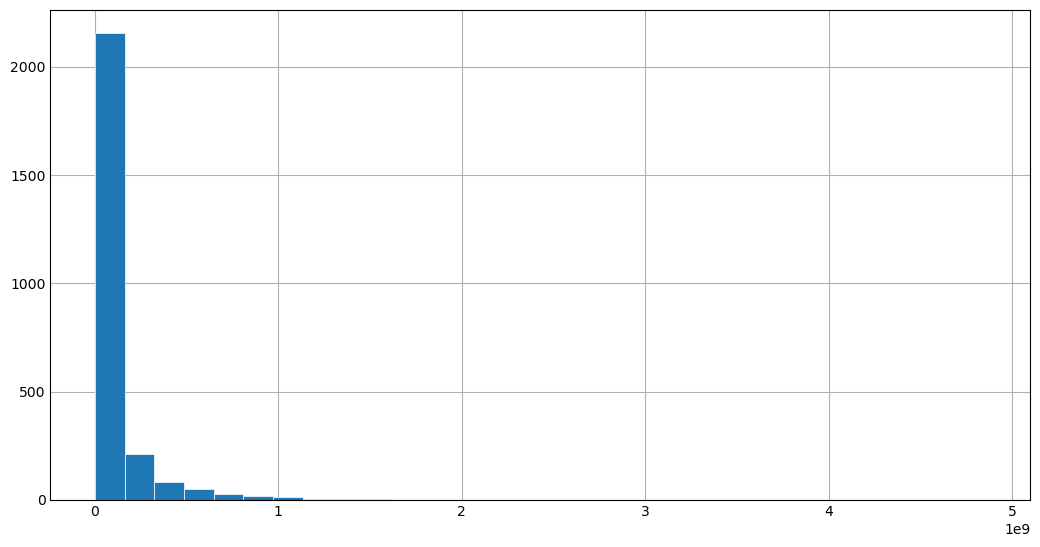

In [141]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = df.revenue[df.revenue > 1]

# plot:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(x, bins = 30, linewidth=0.5, edgecolor="white")

ax.set()

plt.show()

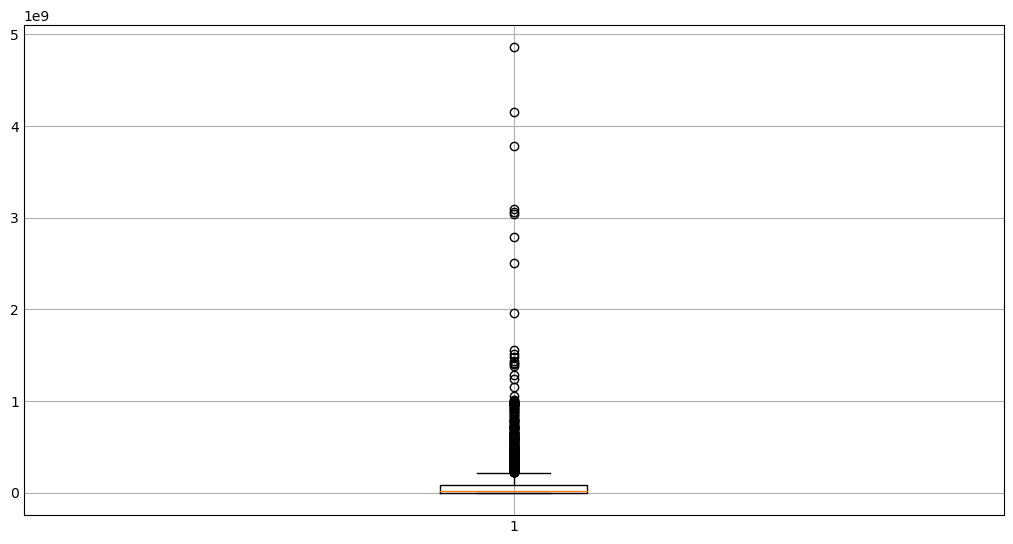

In [142]:
# Creating dataset
np.random.seed(150)
data = df.revenue[df.revenue > 1]

fig = plt.figure(figsize =(10, 5))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

In [134]:
df['non_null_revenue'] = df.revenue[df.revenue > 1]

In [167]:
df

,id,orn,inn,kpp,ogrn,foundation_year,status_add_date,sk_tp_member,sk_tech_member,need_investment,...,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en,fund_name,non_null_revenue
0,5292,1125221,6685136547,668501001,1176658069521,2017,2023-03-03,False,False,False,...,АТОМ ЭКОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АТОМ...",О КОМПАНИИ\n\n• Более 20 лет в строительном ин...,None,None,None,None,None,None,NaN
1,5293,1125222,5905070187,590501001,1215900024174,2021,2023-03-03,False,False,False,...,ПИЦЦАБОТ-ПЕРМЬ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПИЦЦ...",None,None,PIZZABOT-PERM LIMITED LIABILITY COMPANY,PIZZABOT-PERM LIMITED LIABILITY COMPANY,Robotic kiosk-pizzeria - high-quality portione...,None,None,NaN
2,5294,1125223,6679161471,667901001,1226600084424,2022,2023-03-03,False,False,False,...,ПРОЕКТ ОКТОПУС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",None,None,PROJECT OCTOPUS Limited trade development,PROJECT OCTOPUS Limited trade development,"Restoration of hydraulic infrastructure, road ...",None,None,NaN
3,5295,1125224,5040165174,504001001,1195027026314,2019,2023-03-03,False,False,False,...,ГК ТЕХНОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",None,None,None,None,None,None,None,NaN
4,5296,1125225,5001086585,236801001,1125001000255,2012,2023-03-03,False,False,False,...,ДЕВПРОМ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЕВП...",None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,2012,2013-03-20,False,False,True,...,ВНХ-ЭНЕРГО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВНХ-...",ООО «ВНХ-Энерго» с 2012 г. осуществляет научны...,None,VNH-Energo,VNH-Energo,"Technology of recycling biomass, organic waste...",None,ФОНД «СКОЛКОВО»,25821000.00000
3555,412,1120541,7604195933,760401001,1117604000018,2011,2013-03-20,True,False,True,...,ИТЦ КОНТИНУУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧЕСКИЙ ЦЕ...",ИТЦ «Континуум» является разработчиком цифровы...,None,EC Continuum,EC Continuum,The project aims to develop and commercialize ...,None,ФОНД «СКОЛКОВО»,123972000.00000
3556,931,1120543,5408290739,540801001,1115476130956,2011,2013-03-20,False,False,True,...,НПО МФ ТЕХНОЛОГИИ,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НАУЧН...,НПО «МФ Технологии» является разработчиком и п...,None,Limited Liability Company Research and Product...,Limited Liability Company Research and Product...,"Project goal is: \r\n- to create a prototype, ...",None,ФОНД «СКОЛКОВО»,84962000.00000
3557,517,1120539,7731661104,773101001,1107746952433,2010,2013-03-18,False,False,True,...,КРИБРУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""",Компания Крибрум – исследовательская и техноло...,None,Кribrum,Кribrum,None,None,ФОНД «СКОЛКОВО»,146415000.00000


In [147]:
df.non_null_revenue.sum()

263770809000

In [166]:
df

,id,orn,inn,kpp,ogrn,foundation_year,status_add_date,sk_tp_member,sk_tech_member,need_investment,...,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en,fund_name,non_null_revenue
0,5292,1125221,6685136547,668501001,1176658069521,2017,2023-03-03,False,False,False,...,АТОМ ЭКОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АТОМ...",О КОМПАНИИ\n\n• Более 20 лет в строительном ин...,None,None,None,None,None,None,NaN
1,5293,1125222,5905070187,590501001,1215900024174,2021,2023-03-03,False,False,False,...,ПИЦЦАБОТ-ПЕРМЬ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПИЦЦ...",None,None,PIZZABOT-PERM LIMITED LIABILITY COMPANY,PIZZABOT-PERM LIMITED LIABILITY COMPANY,Robotic kiosk-pizzeria - high-quality portione...,None,None,NaN
2,5294,1125223,6679161471,667901001,1226600084424,2022,2023-03-03,False,False,False,...,ПРОЕКТ ОКТОПУС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",None,None,PROJECT OCTOPUS Limited trade development,PROJECT OCTOPUS Limited trade development,"Restoration of hydraulic infrastructure, road ...",None,None,NaN
3,5295,1125224,5040165174,504001001,1195027026314,2019,2023-03-03,False,False,False,...,ГК ТЕХНОЛОГИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",None,None,None,None,None,None,None,NaN
4,5296,1125225,5001086585,236801001,1125001000255,2012,2023-03-03,False,False,False,...,ДЕВПРОМ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЕВП...",None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,323,1120542,7839472039,783901001,1127847657167,2012,2013-03-20,False,False,True,...,ВНХ-ЭНЕРГО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВНХ-...",ООО «ВНХ-Энерго» с 2012 г. осуществляет научны...,None,VNH-Energo,VNH-Energo,"Technology of recycling biomass, organic waste...",None,ФОНД «СКОЛКОВО»,25821000.00000
3555,412,1120541,7604195933,760401001,1117604000018,2011,2013-03-20,True,False,True,...,ИТЦ КОНТИНУУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНЖЕНЕРНО-ТЕХНИЧЕСКИЙ ЦЕ...",ИТЦ «Континуум» является разработчиком цифровы...,None,EC Continuum,EC Continuum,The project aims to develop and commercialize ...,None,ФОНД «СКОЛКОВО»,123972000.00000
3556,931,1120543,5408290739,540801001,1115476130956,2011,2013-03-20,False,False,True,...,НПО МФ ТЕХНОЛОГИИ,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ НАУЧН...,НПО «МФ Технологии» является разработчиком и п...,None,Limited Liability Company Research and Product...,Limited Liability Company Research and Product...,"Project goal is: \r\n- to create a prototype, ...",None,ФОНД «СКОЛКОВО»,84962000.00000
3557,517,1120539,7731661104,773101001,1107746952433,2010,2013-03-18,False,False,True,...,КРИБРУМ,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КРИБРУМ""",Компания Крибрум – исследовательская и техноло...,None,Кribrum,Кribrum,None,None,ФОНД «СКОЛКОВО»,146415000.00000


# топ 30 по выручке

In [198]:
top_revenue = df.sort_values(by='revenue', ascending=False).head(30)


In [200]:
top_revenue

,id,orn,inn,kpp,ogrn,foundation_year,status_add_date,sk_tp_member,sk_tech_member,need_investment,...,name_ru,full_name_ru,description_ru,short_description_ru,name_en,full_name_en,description_en,short_description_en,fund_name,non_null_revenue
3056,1351,1121603,7731326353,773101001,1167746807700,2016,2016-10-06,False,False,True,...,КРОМИС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КРОМИС""","Компания «Кромис», СП Российского фонда прямых...",None,-,-,None,None,ФОНД «СКОЛКОВО»,4857244000.00000
2005,2570,1123096,9717068640,770301001,1187746542180,2018,2020-03-31,False,False,False,...,ВУШ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВУШ""","""Whoosh"" — технологическая компания, которая с...",None,WHOOSH LLC,WHOOSH LLC,"The service is aimed to solve the ""first and l...",None,None,4155054000.00000
832,4002,1124389,9715260691,770401001,1167746512856,2016,2021-12-24,False,False,False,...,ЭВОТОР ОФД,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭВОТ...",«Платформа ОФД» (ООО «Эвотор ОФД» ) - №1 на ры...,None,Platforma OFD,Platforma OFD,Set of IT solutions based on machine learning ...,None,None,3783026000.00000
683,4246,1124540,7704370385,770401001,1167746822946,2016,2022-03-31,False,False,False,...,РСХБ-ИНТЕХ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РСХБ...",МЫ ЗАНИМАЕМСЯ ЦИФРОВОЙ ТРАНСФОРМАЦИЕЙ\nМы — {д...,None,Rosselkhozbank,Rosselkhozbank,None,None,None,3090829000.00000
2545,1908,1122411,7726381870,771401001,1167746654569,2016,2018-12-29,False,False,True,...,ГИКБРЕИНС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГИКБ...","GeekUniversity Pro – платформа, позволяющая IT...",None,GeekBrains,GeekBrains,IT companies may post vacancies and specify sk...,None,None,3058637000.00000
1537,3106,1123629,7728374780,772801001,1177746679175,2017,2020-12-18,False,False,False,...,СТАРТ.РУ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТАР...",ООО «Старт.Ру» владеет одним из самых быстрора...,None,«Start.Ru» LLC,«Start.Ru» LLC,None,None,None,3041555000.00000
2623,1898,1122308,9731003250,773101001,1187746527099,2018,2018-10-10,False,False,True,...,М3,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""М3""",Компания ООО «М3» (more.tv) – платформа по рас...,None,M3,M3,None,None,None,2785451000.00000
2128,2345,1122937,7728369766,773101001,1177746444116,2017,2019-12-27,True,False,False,...,БРС,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БРС""",ООО «БРС» - российская научно-исследовательска...,None,BRS LLC,BRS LLC,None,None,None,2504778000.00000
3099,1425,1121526,7729670341,773101001,5107746005494,2010,2016-08-01,False,False,True,...,РДП.РУ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РДП.РУ""","Компания RDP.RU решает задачи, стоящие перед о...",None,RDP.RU,RDP.RU,None,None,ФОНД «СКОЛКОВО»,1959755000.00000
1157,3627,1124041,7736602705,770401001,1097746232682,2009,2021-07-12,False,False,False,...,МЕДИАНАЦИЯ,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МЕДИ...",Агентство «MediaNation» предоставляет услуги к...,None,MediaNation,MediaNation,None,None,None,1560870000.00000


In [202]:
top_revenue.to_excel('top_30_revenue.xlsx')

# Данные по численности штата

In [189]:
df.staff_number_val[df.staff_number_val > 1].describe()

count   2040.00000
mean      26.70931
std       57.67712
min        2.00000
25%        3.00000
50%        8.00000
75%       25.00000
max      917.00000
Name: staff_number_val, dtype: float64

In [188]:
df.staff_number_val.describe()

count   2732.00000
mean      20.11127
std       51.10931
min        0.00000
25%        1.00000
50%        4.00000
75%       16.00000
max      917.00000
Name: staff_number_val, dtype: float64

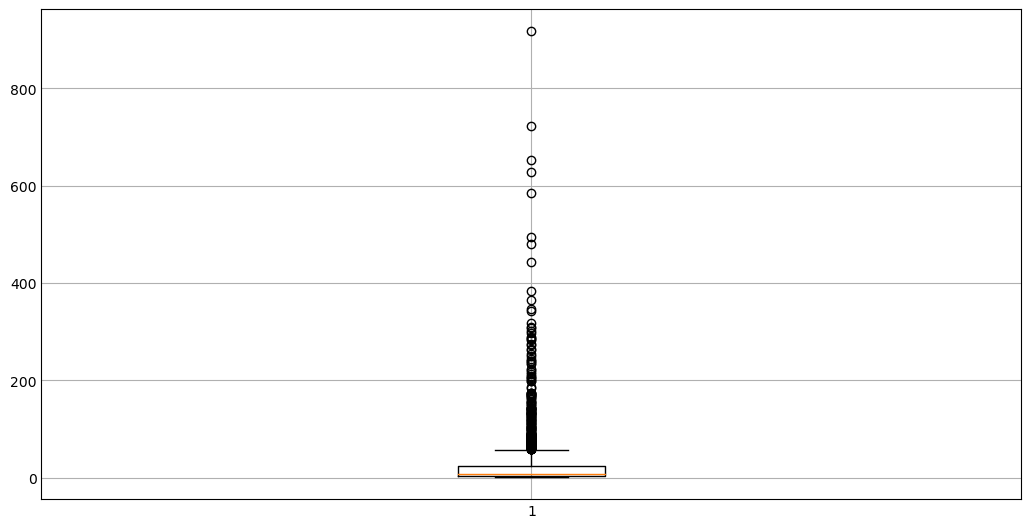

In [169]:
plt.show()
# Creating dataset
np.random.seed(150)
data = df.staff_number_val[df.staff_number_val > 1]

fig = plt.figure(figsize=(10, 5))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

# Топ 30 компаний по кол-ву сотрудников

In [174]:
top_staff = df.sort_values(by='staff_number_val', ascending=False).head(30)

In [185]:
top_staff = top_staff[['inn', 'name_ru', 'staff_number_val', 'foundation_year', 'revenue', 'founders', 'accredited_it', 'grants_values_amount_per_fund']]

In [187]:
top_staff.to_excel('top_staff.xlsx')

# Инвестиционная поддержка

In [203]:
top_invest = df.sort_values(by='grants_values_amount_per_fund', ascending=False).head(30)

In [208]:
top_invest.grants_values_amount_per_fund.sum()

2002221838

In [206]:
top_invest.to_excel('top30_invest.xlsx')

In [207]:
df.grants_values_amount_per_fund.sum()

6889319841